In [30]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math
import statistics as sst
from scipy.stats import pearsonr
import scipy.linalg as la

In [43]:
2==2-0

True

In [44]:
2==2/3*3

True

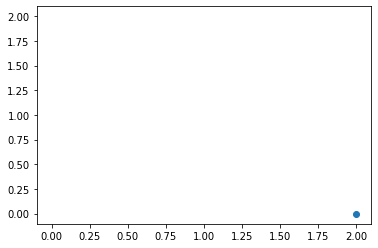

In [49]:
plt.plot(0,2,c='r')
plt.scatter(2,0)

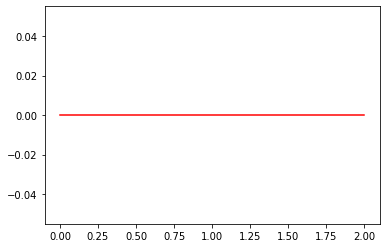

In [51]:
plt.plot(np.linspace(0,2,10),[0]*10,c='r')

In [31]:
A1 = np.random.randn(100)
B1 = np.random.randn(100)

In [32]:
A1

array([ 0.73084394,  0.15781756,  0.51464029, -0.23454888, -1.17841817,
       -1.06839293, -1.46985053, -0.01736251,  0.06254944,  1.69083862,
       -1.68813346,  0.24324088,  0.66069109, -0.94302319,  1.60995594,
       -1.19638305, -0.90266762,  0.71256246, -2.50631629, -0.79617361,
       -1.99175827, -1.85230923,  0.99153917, -0.94533357,  0.13554408,
        0.54433829, -1.84672046,  0.54551606,  0.36043618, -0.98316945,
        0.45278479,  1.03500627, -0.92267823, -0.23485012,  1.13121288,
       -0.55859267, -1.5645846 , -0.82839482, -0.27570764,  0.16449149,
       -0.20579678,  0.35509948, -1.85051956, -0.06716731,  0.0232659 ,
        0.44287518,  0.94143761, -0.68101776,  1.34798654, -1.59611011,
       -0.65577716, -1.14158709,  0.00252983,  0.89836412,  0.99029929,
        0.38985335, -0.91734429, -1.4287851 , -2.23864263,  0.75087569,
        1.2370085 , -0.28071801,  1.06634199, -0.66969684, -0.59883998,
        1.9773461 ,  1.01542246, -0.99951197,  0.37560849, -0.19

([<matplotlib.lines.Line2D at 0x123e2a250>], '标准差为:', 0.9815936991605086)

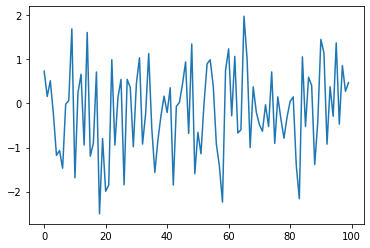

In [33]:
plt.plot(A1),"标准差为:",np.std(A1), 

### 相关性的强度确实是用相关系数的大小来衡量的，但相关大小的评价要以相关系数显著性的评价为前提

因此，要先检验相关系数的显著性，如果显著，证明相关系数有统计学意义，下一步再来看相关系数大小，如果相关系数没有统计学意义，那意味着你研究求得的相关系数也许是抽样误差或者测量误差造成的，再进行一次研究结果可

能就大不一样，此时讨论相关性强弱的意义就大大减弱了。

In [34]:
[{r:p} for r,p in zip(('相关系数：','相关系数显著性：'),pearsonr(A1,B1))] ,'numpy的相关系数计算',np.corrcoef(A1, B1)

([{'相关系数：': 0.0038913894991159516}, {'相关系数显著性：': 0.9693489954139956}],
 'numpy的相关系数计算',
 array([[1.        , 0.00389139],
        [0.00389139, 1.        ]]))

In [35]:
Amat = np.c_[np.ones(A1.shape[0]),A1].T
#la.lstsq(Amat.T,B)
Amat2 = np.vstack([A1**0,A1**1]).T

In [36]:
Amat2

array([[ 1.        ,  0.73084394],
       [ 1.        ,  0.15781756],
       [ 1.        ,  0.51464029],
       [ 1.        , -0.23454888],
       [ 1.        , -1.17841817],
       [ 1.        , -1.06839293],
       [ 1.        , -1.46985053],
       [ 1.        , -0.01736251],
       [ 1.        ,  0.06254944],
       [ 1.        ,  1.69083862],
       [ 1.        , -1.68813346],
       [ 1.        ,  0.24324088],
       [ 1.        ,  0.66069109],
       [ 1.        , -0.94302319],
       [ 1.        ,  1.60995594],
       [ 1.        , -1.19638305],
       [ 1.        , -0.90266762],
       [ 1.        ,  0.71256246],
       [ 1.        , -2.50631629],
       [ 1.        , -0.79617361],
       [ 1.        , -1.99175827],
       [ 1.        , -1.85230923],
       [ 1.        ,  0.99153917],
       [ 1.        , -0.94533357],
       [ 1.        ,  0.13554408],
       [ 1.        ,  0.54433829],
       [ 1.        , -1.84672046],
       [ 1.        ,  0.54551606],
       [ 1.        ,

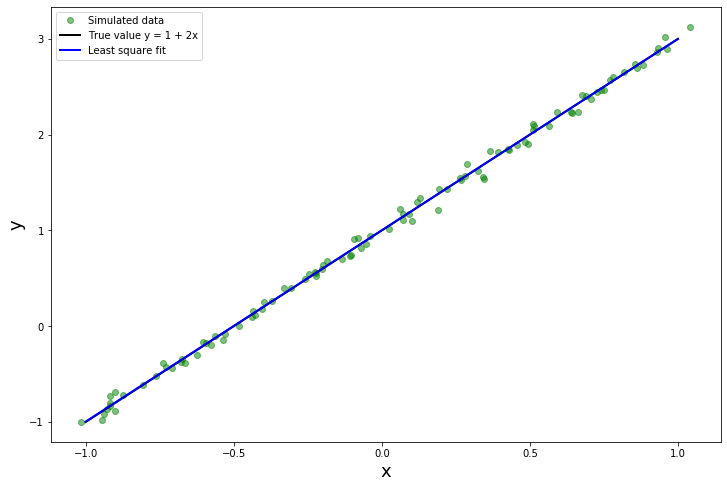

In [37]:
import numpy as np
import matplotlib.pyplot as plt
m = 100
x = np.linspace(-1, 1, m)
y_exact = 1 + 2 * x
xi = x + np.random.normal(0, 0.05, 100)
yi = 1 + 2 * xi + np.random.normal(0, 0.05, 100)
A = np.vstack([xi**0, xi**1])
sol, r, rank, s = la.lstsq(A.T, yi)   #求取各个系数大小
y_fit = sol[0] + sol[1] * x
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(xi, yi, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value y = 1 + 2x')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("y", fontsize=18)
ax.legend(loc=2)         #设置曲线标注位置
plt.show()


### 二次函数最小二乘法
这个程序和上面的程序差不多，只不过模型变成了f(xi)=a+bx+cx2f(xi)=a+bx+cx2了而已，请自己分析分析。
完整程序如下：

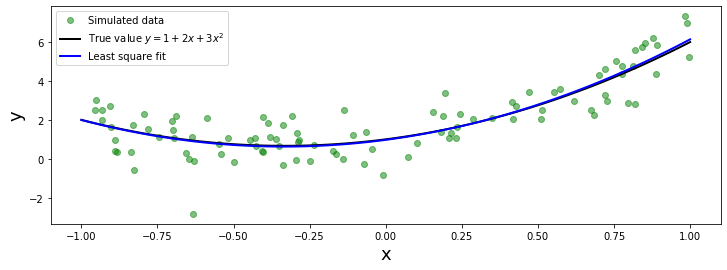

In [38]:
import scipy.linalg as la
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-1, 1, 100)
a, b, c = 1, 2, 3
y_exact = a + b * x + c * x**2
m = 100
xi=1 - 2 * np.random.rand(m)
yi=a + b * xi + c * xi**2 + np.random.randn(m)
A = np.vstack([xi**0, xi**1, xi**2])
sol, r, rank, s = la.lstsq(A.T, yi)
y_fit = sol[0] + sol[1] * x + sol[2] * x**2
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(xi, yi, 'go', alpha=0.5, label='Simulated data')
ax.plot(x, y_exact, 'k', lw=2, label='True value $y = 1 + 2x + 3x^2$')
ax.plot(x, y_fit, 'b', lw=2, label='Least square fit')
ax.set_xlabel("x", fontsize=18)
ax.set_ylabel("y", fontsize=18)
ax.legend(loc=2)
plt.show()

导数

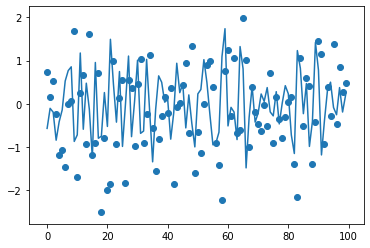

In [39]:
X = np.arange(len(A1))
Y = A1
plt.plot(np.gradient(A1))
#plt.plot()
plt.scatter(X,Y)
plt.show()
plt.close()

In [40]:
g = np.gradient(A1)#梯度

g.shape , A1.shape,g

((100,),
 (100,),
 array([-5.73026383e-01, -1.08101823e-01, -1.96183215e-01, -8.46529233e-01,
        -4.16922026e-01, -1.45716178e-01,  5.25515211e-01,  7.66199983e-01,
         8.54100563e-01, -8.75341451e-01, -7.23798872e-01,  1.17441228e+00,
        -5.93132033e-01,  4.74632426e-01, -1.26679932e-01, -1.25631178e+00,
         9.54472757e-01, -8.01824335e-01, -7.54368034e-01,  2.57279007e-01,
        -5.28067811e-01,  1.49164872e+00,  4.53487831e-01, -4.27997541e-01,
         7.44835930e-01, -9.91132272e-01,  5.88882455e-04,  1.10357832e+00,
        -7.64342756e-01,  4.61743063e-02,  1.00908786e+00, -6.87731511e-01,
        -6.34928197e-01,  1.02694556e+00, -1.61871276e-01, -1.34789874e+00,
        -1.34901075e-01,  6.44438477e-01,  4.96443156e-01,  3.49554314e-02,
         9.53039944e-02, -8.22361392e-01, -2.11133392e-01,  9.36892733e-01,
         2.55021242e-01,  4.59085856e-01, -5.61946466e-01,  2.03274463e-01,
        -4.57546178e-01, -1.00188185e+00,  2.27261508e-01,  3.29153494

In [41]:
np.gradient(np.mat(np.random.randn(10).reshape(2,5)))

[matrix([[-1.49113791,  3.05173754,  1.34015203,  0.17168371, -1.11149921],
         [-1.49113791,  3.05173754,  1.34015203,  0.17168371, -1.11149921]]),
 matrix([[-2.86324545, -1.18923713,  0.62818641,  1.50378526,  2.2359689 ],
         [ 1.67963   ,  0.22640784, -0.81184051,  0.27795964,  0.95278598]])]

In [42]:
testg = np.array([1,2,3,3,5,0])
mygradient = lambda vector , bindex : (vector[bindex+1]-vector[bindex-1])/2 #梯度计算的公式，梯度就是导数
 
np.gradient(testg),mygradient(testg,4)

(array([ 1. ,  1. ,  0.5,  1. , -1.5, -5. ]), -1.5)